In [115]:
import pandas as pd
import numpy as np
import streamlit as st
from nltk import word_tokenize 
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from utils import show_wordcloud

%load_ext autoreload
%autoreload 2

In [102]:
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to /Users/Mariko/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Mariko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mariko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Mariko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
stemmer = PorterStemmer()
vectorizer = TfidfVectorizer()
stpwrds = set(stopwords.words("english"))

In [104]:
# read with pandas
df_pandas = pd.read_json('arxivData.json')

# convert string to python object
for key in ["author", "link", "tag"]:
    df_pandas[key] = df_pandas[key].agg(eval, axis=0)

df_pandas.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [105]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [106]:
stopwords = set(nltk.corpus.stopwords.words("english"))


In [107]:
sample = "We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention. The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question. Our single model outperforms the first place winner on the VQA 1.0 dataset, performs within margin to the current state-of-the-art ensemble model. We also experiment with replacing attention mechanisms in other state-of-the-art models with our implementation and show increased accuracy??"

In [108]:
tokens = df_pandas["summary"].agg(clean)


In [109]:
df_pandas["tokens"] = tokens

In [110]:
df_pandas['tokens_str'] = df_pandas['tokens'].apply(lambda x: ','.join(map(str, x)))

In [111]:
text = " ".join(summ for summ in df_pandas.tokens_str.astype(str))

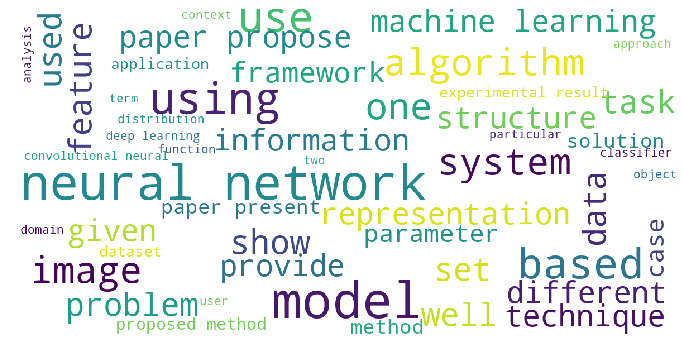

In [119]:
show_wordcloud(text, maxwords=50)